<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Preparacion-de-datos/Preparacion_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primera fase del proceso de prediccion con ML

##Importamos las librerias






In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sklearn

*   Para que los graficos estén directamente en la notebook *(esto se puede importar directamente en el bloque anterior)*



In [0]:
%matplotlib inline

##Importamos el Dataset



*   En Jupyter Notebooks cargamos el dataset con la libreria pandas pd.read_csv, esta libreria tambien permite otro tipo de manejo de datos con los dataframe.
*   En Google Colab hacemos la carga del dataset directamente desde Drive usando los siguentes [pasos](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA)


1. Primero hacemos la autenticacion con Google Drive

In [4]:
#movies = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\peliculas.csv') 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


2. Cargamos el CSV desde Drive

In [0]:
path = "/content/drive/My Drive/Peliculas/peliculas.csv"
movies = pd.read_csv('/content/drive/My Drive/Peliculas/peliculas.csv')



*   Verificamos que el dataframe se haya cargado correctamente


In [6]:
type(movies)

pandas.core.frame.DataFrame

*   Con head podemos ver las 5 primeras muestras en un dataframe, no olvidar los ()

In [7]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN




*   En pandas tambien se puede conocer la dimension de un dataframe con shape un dataframe es basicamente una matriz



In [8]:
movies.shape

(5043, 19)

1.   Podemos acceder a los indices de las columnas con columns

In [9]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

*   Tambien podemos acceder a los indices de las filas con index (parecido a arange en numpy)




In [10]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

*   Para acceder a un feature en especifico podemos instanciarlo con el index obtenido
*   Si queremos ver los primeros 5 datos del feature usamos .head

In [11]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

 *   Tambien podemos acceder a una linea de una forma parecida a la sintaxis de numpy pero con loc


In [12]:
linea10 = movies.loc[10,:]
print(linea10)

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

*   Inspeccionamos los datos con info



In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

*   Ademas si lo que deseamos es solo saber  los tipos de cada feature usamos dtypes

In [14]:
movies.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

##Inspeccion de tipos y segmentacion

* Podemos verificar el tipo especifico de cada columna lo cual nos devolverá un valor boleano
 

In [15]:
movies.dtypes == float

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

* Tambien podemos usar or para verificar varias condiciones a la vez


In [16]:
(movies.dtypes == float) | (movies.dtypes == float) | (movies.dtypes == 'int64')

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

* pandas maneja el tipo de texto como object
 

In [17]:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

* Creamos una nueva columna para poder extraer los features que tienen datos numericos


In [19]:
num = (movies.dtypes == float) | (movies.dtypes == float) | (movies.dtypes == 'int64')
num

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [20]:
for e1 in num:
    print(e1)

False
True
False
True
True
False
False
True
False
False
False
False
False
False
False
True
True
True
True


* Creamos una nueva variable para extraer las columnas que tienen valores numericos
* Tomamos todas las columnas dentro de num.index y las agregamos a num_cols solo si num[c] es true


In [21]:
num_cols = [c for c in num.index if num[c]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

* Hacemos lo mismo pero con las features que contengan obj

In [0]:
obj = (movies.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

* Verificamos que se hayan agregados los features correctos

In [22]:
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

* Instanciamos las features verificadas

In [0]:
movies_num = movies[num_cols]

* Con describe() podemos observar las caracteristicas generales de nuestras columnas numéricas


In [25]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


* Podemos visualizar graficos de las columnas numéricas con la funcion hist() y seleccionando una columna


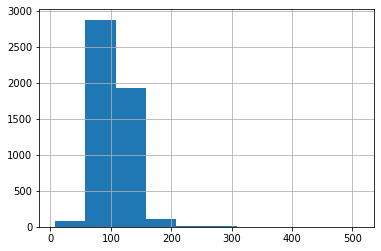

In [26]:
movies_num['duration'].hist()

* Seguimos revisando y las columnas tienen una distribucion que tiende a la normal


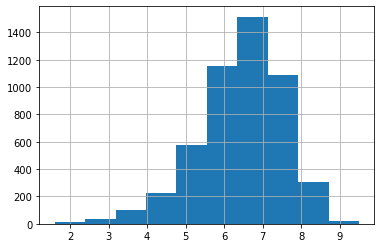

In [27]:
movies_num['imdb_score'].hist()

* En el siguiente caso tenemos datos que están distorisionando la informacion por lo cual deben ser arreglados


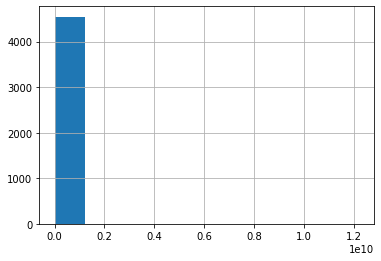

In [29]:
movies_num['budget'].hist()

* Usamos la tecnica boolean filtering para averiguar que películas están distorsionando nuestra feature, esta técnica nos entrega un boleano dependiendo del parametro que establezcamos


In [30]:
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

* ya que sabemos que hay 6 peliculas que están distorsionando la informacion las guardamos dentro de mask para poder separarlas del resto de la informacion, mask es un contenedor temporal para poder manejar estas distorsiones de mejor manera


In [0]:
mask = (movies_num['budget'] > 1e9)

* Podemos saber cuales peliculas son las que nos generan el error en la informacion si consultamos mask en movies ahora vamos a obtener solo los valores de mask que sean True

In [33]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


##Cargando un nuevo dataframe

* Como los valores de ingresos no se encuentran en una misma moneda (en este caso son yenes) hay que buscar los datos correctos en otro dataframe


In [34]:
pd.read_csv('/content/drive/My Drive/Peliculas/thenumbers.csv')

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


* Instanciamos el dataframe con la feature en dolares

In [0]:
financials = pd.read_csv('/content/drive/My Drive/Peliculas/thenumbers.csv')

* No necesitamos todas las features de este nuevo dataframe así que instanciamos las necesarias nuevamente

In [38]:
financials = financials[['movie_title','production_budget','worldwide_gross']]
financials.head()

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099


##Uniendo dos dataframes

* Analizando las dimensiones de los dos dataframes vemos que al hacer un merge vamos a perder datos en este caso dada la importancia y la cantidad de los datos es posible aceptar la perdida de algunos (702 para ser exactos)


In [40]:
print(movies.shape)
print(financials.shape)

(5043, 19)
(4341, 3)


* Para poder hacer el join entre los dataframes necesitamos el nombre de la pelicula para que sea la llave tenemos que agregar el nombre de la pelicula a nuestro movies_num aprovechando que tienen el mismo indice por defecto la concatenacion se hace por lineas, para que sea por columnas agregamos axis=1


In [41]:
movies_num = pd.concat([movies_num, movies['movie_title']],axis=1)
movies_num.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...


* Una vez tenemos las llaves realizamos el merge entre los dataframes con pd.merge escribimos los nombres de los dataframes a unir usamos on= para definir cual será la llave para realizar el merge usamos how= para saber con cuantos datos nos vamos a quedar, en este caso con los 4341 de financials


In [0]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left')

In [44]:
movies_v2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [46]:
movies_v2.shape

(4385, 11)

* Una vez verificamos la salud de nuestros datos es importante revisar cuales son los datos faltantes con notnull() podemos ver en que columnas hay datos faltantes con false

In [47]:
movies_v2.notnull()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,True,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,True,True,False,True,True,True,True,True,False


* Para saber exactamente cuantos datos faltantes tenemos usamos apply y le pasamos value_counts para que consolide


In [48]:
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


* Tambien es necesario revisar las columnas que si tienen valor pero está en cero, para esto usamos diferente de cero !=0


In [49]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


* Instanciamos una nueva variable que nos permita aislar los valores que están vacios o son nulos

In [51]:
avaliable = ((movies_v2 != 0) & (movies_v2.notnull()))
avaliable.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


* Podemos usar una forma para saber en que columnas hay datos falsos con all que toma todas las features a traves de axis=1 e indica si cualquiera de las features tiene un valor cero o no tiene valor a través de un booleano 


In [52]:
avaliable.all(axis=1)

0        True
1       False
2        True
3        True
4        True
        ...  
4380    False
4381    False
4382    False
4383    False
4384     True
Length: 4385, dtype: bool

* Una vez sabemos que existen datos falsos contamos cuantos de ellos tenemos usando nuevamente value_counts()


In [53]:
avaliable.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

* Creamos una mascara que nos ayudará a establecer cuantos datos son validos en worldwide_gross asignamos la mascara a movies_v2 ya que de otra manera no se puede realizar el conteo


In [0]:
mask = avaliable['worldwide_gross']
movies_v2 = movies_v2[mask]

* Como vimos en anteriores lineas nos quedarian 4104 datos con valores distintos a 0


In [55]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

* Ahora vamos a hacer uso de scikit-learn para el manejo de los datos faltantes iniciamos importando la libreria y abreviando
* Con imputer vamos a hacer el reemplazo de los datos faltantes en el dataframe missing_values= le indicamos cuales valores son los que van a ser reemplazados strategy= es la forma en la que se van a realizar estos cambios (revisar documentacion) axis=1 para que tome las columnas

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

* Solo necesitamos datos numéricos así que quitamos la feature del titulo de la pelicula con drop


In [0]:
movies_v2 = movies_v2.drop('movie_title',axis=1)

* Igualmente si revisamos las features de nuestro dataset vemos que tenemos una de ellas duplicada y la eliminamos con el comando drop


In [0]:
movies_v2 = movies_v2.drop('duration.1',axis=1)

* Ya tenemos el dataframe solo con datos numéricos


In [59]:
movies_v2

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...
4378,7000,841926,2004.0,1.85,77.0,368,7000.0,7.0,424760.0
4379,7000,71644,2005.0,NaN,80.0,0,7000.0,6.3,70071.0
4380,7000,900,2005.0,NaN,84.0,93,3250.0,7.8,NaN
4382,3967,10443,2012.0,2.35,100.0,2386,NaN,6.3,10443.0


* Usamos imputer para transformar los valores nan al promedio de toda la columna


In [0]:
values = imputer.fit_transform(movies_v2)

* Podemos ver que ya no tenemos valores nan aunque ahora están organizados de otra manera


In [61]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

* Estos son los valores del dataframe con nan para verificar que si se realizó el cambio


In [62]:
movies_v2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

* Instanciamos los valores corregidos en X


In [0]:
X = pd.DataFrame(values)

* Reorganizamos los valores de X en funcion de las features numéricas de nuestro dataframe movies_v2


In [0]:
X.columns = movies_v2.columns

* Reorganizamos los valores de x en función de los indices de movies_v2 


In [0]:
X.index = movies_v2.index

* Verificamos que no existan ya valores nan


In [69]:
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...,...
4378,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4379,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4380,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4382,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


* Exportamos el resultado en formato csv

In [0]:
X.to_csv('/content/drive/My Drive/Peliculas/X.csv',index=False)